<a href="https://colab.research.google.com/github/JJay1010/K-software_-/blob/main/SuminLee/Project2_0110_Sumin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.프로젝트 개요
- 주제: 경구 약제 이미지 분류
- 내용: 이미지 데이터 전처리 및 데이터 확인, 이미지 분류
- 사용 기술 스택: Python, Pillow or Opencv, Deep learning, Git
- 사용 데이터: AIhub 경구 약제 이미지 데이터 (한국지능정보사회진흥원)

#2.프로젝트 계획
**- 1월 10일**
- Drive에 데이터 로드 (대용량 데이터를 어떻게 처리할 것인가?)
- -> 서버를 구축하면 좋겠지만...
- -> 구글 드라이브
- 데이터 확인
- -> 각 이미지 안에 총 4개의 약이 포함되어있다.
- -> multiple object problem => 위치를 어떻게 찾을 것인가?
- -> 위치를 찾지 말고 좌표 값으로!
- 데이터 전처리

**- 1월 11일**
- 데이터 전처리
- 1) 어떻게 이름을 다 불러올 것인가?
- -> 폴더명에서 이름을 추출하여 집합 처리하기
- -> 생각보다 json과 image 파일 매칭이 꼬임...

**-1월 12일**
- 일단! 임의의 json, image 파일로 크롭이라도 해보자!!
- 목표 변경
- 1) json에서 bbox 값 추출 (완료)
- 2) Pillow 라이브러리 다루기 (이미지 불러오기, 크롭) (완료)
- 3) 가장 하위 폴더의 이미지셋 크롭하기

In [79]:
#라이브러리
from PIL import Image
import os
import json

In [80]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#임의의 이미지 로드
# 알약 4개의 조합: 000250, 000573, 002483, 006192
image = Image.open('/content/drive/MyDrive/Project2/DataSet/TS_1/K-000250-000573-002483-006192/K-000250-000573-002483-006192_0_2_0_2_90_000_200.png')
#image = image.convert('RGB')
#image = image.resize(100, 100)


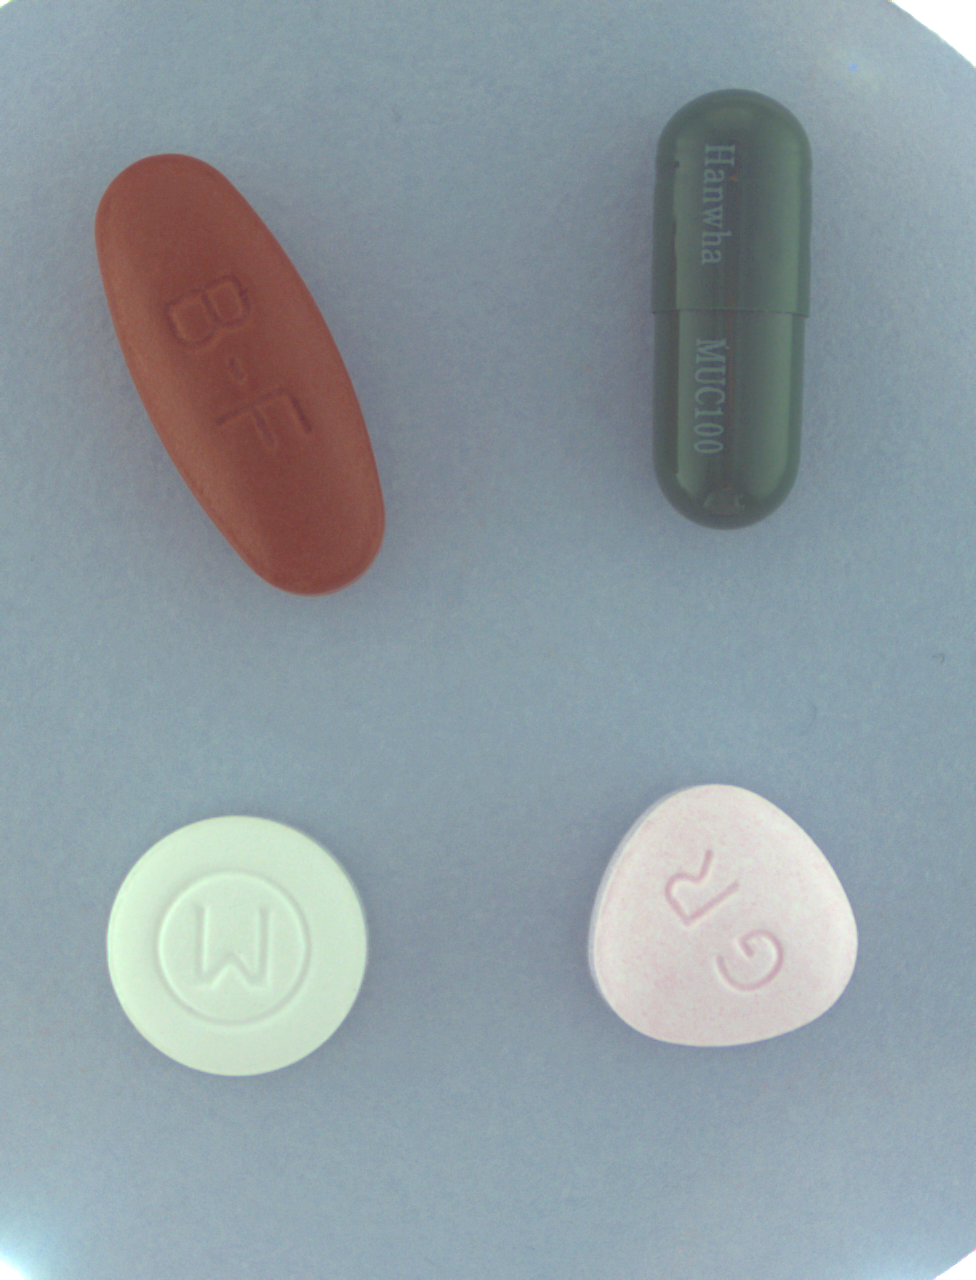

In [ ]:
display(image)

In [ ]:
#임의의 json 파일 로드
# 알약: 000250
example_file = open('/content/drive/MyDrive/Project2/DataSet/TL_1/K-000250-000573-002483-006192_json/K-000250/K-000250-000573-002483-006192_0_2_0_2_90_000_200.json')
json_file = json.load(example_file)

In [ ]:
#json "annotations" 정보
json_file.get('annotations')

[{'area': 79523,
  'iscrowd': 0,
  'bbox': [100, 802, 281, 283],
  'category_id': 1,
  'ignore': 0,
  'segmentation': [],
  'id': 1,
  'image_id': 1}]

In [ ]:
#bBox 값 추출
bBox = json_file['annotations'][0]['bbox']

In [ ]:
print(bBox)

[100, 802, 281, 283]


In [ ]:
#crop(시작점 x좌표, 시작점 y좌표, 범위, 범위)
croppedImage = image.crop(((100, 802, 381, 1085)))


In [ ]:
print(croppedImage.size)

(281, 283)


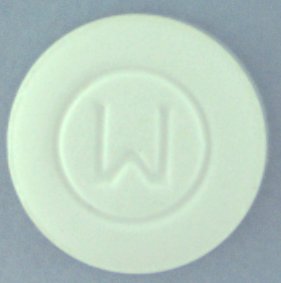

In [ ]:
display(croppedImage)

In [81]:
#상위 폴더에서 있는 폴더 다 긁어온다. (이미지)
path_root_images = "/content/drive/MyDrive/Project2/DataSet/TS_1/"

image_folder_list = (os.listdir(path_root_images))
print(image_folder_list)

['K-000250-000573-002483-006192', 'K-000250-000573-006192-044834', 'K-000250-000573-005002-012778', 'K-000250-000573-005002-006192', 'K-000250-000573-002483-012778', 'K-000250-000573-006192-013161', 'K-000250-000573-006192-037777', 'K-000250-000573-012778-013161', 'K-000250-000573-002483-023223', 'K-000250-000573-006192-038954', 'K-000250-000573-002483-022627', 'K-000250-000573-005002-023223', 'K-000250-000573-005002-019552', 'K-000250-000573-005002-022627', 'K-000250-000573-002483-019552', 'K-000250-000573-012778-037777', 'K-000250-000573-013161-022627', 'K-000250-000573-013161-023223', 'K-000250-000573-012778-038954', 'K-000250-000573-019552-044834', 'K-000250-000573-019552-038954', 'K-000250-000573-012778-044834', 'K-000250-000573-019552-037777', 'K-000250-000573-022627-037777', 'K-000250-000573-023223-037777', 'K-000250-000573-013161-019552', 'K-000250-000573-022627-038954', 'K-000250-000573-023223-038954', 'K-000250-000573-023223-044834', 'K-000250-000573-022627-044834', 'K-000250

In [82]:
#이미지 파일명들을 담은 리스트를 모아둔 것
image_list_set = []

In [83]:
# 수정본>>>>>

def drug_image_name(drugs_name):
  path_images = path_root_images+drugs_name+"/"
  image_list = (os.listdir(path_images))
  

  for i in range(0, len(image_list)):
    if image_list[i].find("index") != -1:
      del image_list[i]
      break
  
  image_list_set.append(image_list)
      

In [84]:
# 추가본>>>>
for name in image_folder_list:
  drug_image_name(name)

In [85]:
print(image_list_set)

[['K-000250-000573-002483-006192_0_2_0_2_90_000_200.png', 'K-000250-000573-002483-006192_0_2_0_2_70_000_200.png', 'K-000250-000573-002483-006192_0_2_0_2_75_000_200.png'], ['K-000250-000573-006192-044834_0_2_0_2_90_000_200.png', 'K-000250-000573-006192-044834_0_2_0_2_70_000_200.png', 'K-000250-000573-006192-044834_0_2_0_2_75_000_200.png'], ['K-000250-000573-005002-012778_0_2_0_2_70_000_200.png', 'K-000250-000573-005002-012778_0_2_0_2_75_000_200.png', 'K-000250-000573-005002-012778_0_2_0_2_90_000_200.png'], ['K-000250-000573-005002-006192_0_2_0_2_70_000_200.png', 'K-000250-000573-005002-006192_0_2_0_2_75_000_200.png', 'K-000250-000573-005002-006192_0_2_0_2_90_000_200.png'], ['K-000250-000573-002483-012778_0_2_0_2_70_000_200.png', 'K-000250-000573-002483-012778_0_2_0_2_75_000_200.png', 'K-000250-000573-002483-012778_0_2_0_2_90_000_200.png'], ['K-000250-000573-006192-013161_0_2_0_2_90_000_200.png', 'K-000250-000573-006192-013161_0_2_0_2_75_000_200.png', 'K-000250-000573-006192-013161_0_2_0

In [86]:
#수정본>>>>
path_root_jsons = "/content/drive/MyDrive/Project2/DataSet/TL_1/"
json_folder_list_set = (os.listdir(path_root_jsons))
print(json_folder_list_set)

['K-000250-012778-013395-037777_json', 'K-000250-013161-022362-022627_json', 'K-000250-013161-019552-022362_json', 'K-000250-012778-022362-038954_json', 'K-000250-013161-013395-023223_json', 'K-000250-012778-022362-037777_json', 'K-000250-012778-022362-044834_json', 'K-000250-013161-022362-023223_json', 'K-000250-013161-013395-019552_json', 'K-000250-013161-013395-022627_json', 'K-000250-012778-013395-044834_json', 'K-000250-012778-013395-038954_json', 'K-000250-013395-023223-038954_json', 'K-000250-013395-022627-037777_json', 'K-000250-013395-022627-044834_json', 'K-000250-013395-022627-038954_json', 'K-000250-013395-019552-037777_json', 'K-000250-013395-019552-044834_json', 'K-000250-013395-023223-037777_json', 'K-000250-019552-022362-037777_json', 'K-000250-013395-019552-038954_json', 'K-000250-013395-023223-044834_json', 'K-000573-001866-002483-006192_json', 'K-000250-022362-022627-037777_json', 'K-000573-001866-002483-023223_json', 'K-000250-022362-022627-038954_json', 'K-000573-0

In [88]:
#수정본
def drug_folder_name(drugs_name_json):
  drug_li_path = path_root_jsons+drugs_name_json+"/"
  json_folder_list = (os.listdir(drug_li_path)) #약 이름명 (폴더명)
  drug_list_set.append(json_folder_list)


In [89]:
json_list_set = []
for drugs_name_json in json_folder_list_set:
  drug_folder_name(drugs_name_json)

In [90]:
print(drug_list_set)

[['K-000250', 'K-013395', 'K-012778', 'K-037777'], ['K-022627', 'K-000250', 'K-022362', 'K-013161'], ['K-013161', 'K-000250', 'K-019552', 'K-022362'], ['K-000250', 'K-012778', 'K-038954', 'K-022362'], ['K-023223', 'K-013161', 'K-000250', 'K-013395'], ['K-022362', 'K-012778', 'K-000250', 'K-037777'], ['K-022362', 'K-000250', 'K-012778', 'K-044834'], ['K-022362', 'K-000250', 'K-023223', 'K-013161'], ['K-000250', 'K-019552', 'K-013395', 'K-013161'], ['K-013395', 'K-000250', 'K-013161', 'K-022627'], ['K-044834', 'K-000250', 'K-012778', 'K-013395'], ['K-038954', 'K-000250', 'K-012778', 'K-013395'], ['K-000250', 'K-013395', 'K-023223', 'K-038954'], ['K-013395', 'K-000250', 'K-022627', 'K-037777'], ['K-000250', 'K-022627', 'K-044834', 'K-013395'], ['K-000250', 'K-038954', 'K-022627', 'K-013395'], ['K-000250', 'K-013395', 'K-019552', 'K-037777'], ['K-019552', 'K-000250', 'K-044834', 'K-013395'], ['K-037777', 'K-013395', 'K-023223', 'K-000250'], ['K-037777', 'K-022362', 'K-000250', 'K-019552'],

In [91]:
print(drug_list_set[0])

['K-000250', 'K-013395', 'K-012778', 'K-037777']


In [92]:
json_file_list2_set = []
for i in range(0, len(drug_list_set)):
  for j in range(0, len(drug_list_set[i])):
    json_li_path = path_root_jsons+json_folder_list_set[i]+"/"+drug_list_set[i][j]
    print(json_li_path)
    json_file_list2 = (os.listdir(json_li_path))
    json_file_list2_set.append(json_file_list2)
print(json_file_list2_set)

/content/drive/MyDrive/Project2/DataSet/TL_1/K-000250-012778-013395-037777_json/K-000250
/content/drive/MyDrive/Project2/DataSet/TL_1/K-000250-012778-013395-037777_json/K-013395
/content/drive/MyDrive/Project2/DataSet/TL_1/K-000250-012778-013395-037777_json/K-012778
/content/drive/MyDrive/Project2/DataSet/TL_1/K-000250-012778-013395-037777_json/K-037777
/content/drive/MyDrive/Project2/DataSet/TL_1/K-000250-013161-022362-022627_json/K-022627
/content/drive/MyDrive/Project2/DataSet/TL_1/K-000250-013161-022362-022627_json/K-000250
/content/drive/MyDrive/Project2/DataSet/TL_1/K-000250-013161-022362-022627_json/K-022362
/content/drive/MyDrive/Project2/DataSet/TL_1/K-000250-013161-022362-022627_json/K-013161
/content/drive/MyDrive/Project2/DataSet/TL_1/K-000250-013161-019552-022362_json/K-013161
/content/drive/MyDrive/Project2/DataSet/TL_1/K-000250-013161-019552-022362_json/K-000250
/content/drive/MyDrive/Project2/DataSet/TL_1/K-000250-013161-019552-022362_json/K-019552
/content/drive/MyDriv

In [ ]:
# 삭제!!
#임의의 json 파일 로드
# 알약: 000250
#example_file = open('/content/drive/MyDrive/Project2/DataSet/TL_1/K-000250-000573-002483-006192_json/K-000250/K-000250-000573-002483-006192_0_2_0_2_90_000_200.json')
json_list_set = [] #하나의 약에 대한 json의 집합을 한 리스트에 담는다.
# json_list_set = [json_list, json_list, json_list]
#[[1번 약 json A, 1번 약 json B, 1번 약 json C], [2번 약 json A, 2번 약 json B, 2번 약 json C],[3번 약 json A, 3번 약 json B, 3번 약 json C]]
path_jsons = "/content/drive/MyDrive/Project2/DataSet/TL_1/K-000250-000573-002483-006192_json/"
for drug_name in json_folder_list:
  path_jsons = path_jsons+drug_name
  print(path_jsons)
  json_list = (os.listdir(path_jsons))
  print(json_list)
  json_list_set.append(json_list)
  path_jsons = "/content/drive/MyDrive/Project2/DataSet/TL_1/K-000250-000573-002483-006192_json/"
print(json_list_set)
  

/content/drive/MyDrive/Project2/DataSet/TL_1/K-000250-000573-002483-006192_json/K-000250
['K-000250-000573-002483-006192_0_2_0_2_70_000_200.json', 'K-000250-000573-002483-006192_0_2_0_2_75_000_200.json', 'K-000250-000573-002483-006192_0_2_0_2_90_000_200.json']
/content/drive/MyDrive/Project2/DataSet/TL_1/K-000250-000573-002483-006192_json/K-000573
['K-000250-000573-002483-006192_0_2_0_2_70_000_200.json', 'K-000250-000573-002483-006192_0_2_0_2_75_000_200.json', 'K-000250-000573-002483-006192_0_2_0_2_90_000_200.json']
/content/drive/MyDrive/Project2/DataSet/TL_1/K-000250-000573-002483-006192_json/K-002483
['K-000250-000573-002483-006192_0_2_0_2_70_000_200.json', 'K-000250-000573-002483-006192_0_2_0_2_75_000_200.json', 'K-000250-000573-002483-006192_0_2_0_2_90_000_200.json']
/content/drive/MyDrive/Project2/DataSet/TL_1/K-000250-000573-002483-006192_json/K-006192
['K-000250-000573-002483-006192_0_2_0_2_70_000_200.json', 'K-000250-000573-002483-006192_0_2_0_2_75_000_200.json', 'K-000250-000

In [ ]:
len(json_list)

3

In [95]:
#파일명 확인
image_list_set

[['K-000250-000573-002483-006192_0_2_0_2_90_000_200.png',
  'K-000250-000573-002483-006192_0_2_0_2_70_000_200.png',
  'K-000250-000573-002483-006192_0_2_0_2_75_000_200.png'],
 ['K-000250-000573-006192-044834_0_2_0_2_90_000_200.png',
  'K-000250-000573-006192-044834_0_2_0_2_70_000_200.png',
  'K-000250-000573-006192-044834_0_2_0_2_75_000_200.png'],
 ['K-000250-000573-005002-012778_0_2_0_2_70_000_200.png',
  'K-000250-000573-005002-012778_0_2_0_2_75_000_200.png',
  'K-000250-000573-005002-012778_0_2_0_2_90_000_200.png'],
 ['K-000250-000573-005002-006192_0_2_0_2_70_000_200.png',
  'K-000250-000573-005002-006192_0_2_0_2_75_000_200.png',
  'K-000250-000573-005002-006192_0_2_0_2_90_000_200.png'],
 ['K-000250-000573-002483-012778_0_2_0_2_70_000_200.png',
  'K-000250-000573-002483-012778_0_2_0_2_75_000_200.png',
  'K-000250-000573-002483-012778_0_2_0_2_90_000_200.png'],
 ['K-000250-000573-006192-013161_0_2_0_2_90_000_200.png',
  'K-000250-000573-006192-013161_0_2_0_2_75_000_200.png',
  'K-0002

In [96]:
real_image_list_set= [] # 이미지 리스트들을 담는 리스트
real_image_list = []

In [97]:
# def openImage(name):
#   file_path = '{}/{}.png'.format(path_images, name)
#   print(file_path)
#   image = Image.open(file_path)
#   real_image_list.append(image)
# path_root_images = "/content/drive/MyDrive/Project2/DataSet/TS_1/"

# image_folder_list = (os.listdir(path_root_images))
# print(image_folder_list)

def openImage(drugs_name, name):
  

  file_path = path_root_images+drugs_name+"/"+name
  #print(file_path)
  image = Image.open(file_path)
  print(file_path)
  real_image_list.append(image)
  return real_image_list


    # image_list = (os.listdir(path_images))
    # image_list_set.append(image_list)

In [98]:
  image_list_set[0]

['K-000250-000573-002483-006192_0_2_0_2_90_000_200.png',
 'K-000250-000573-002483-006192_0_2_0_2_70_000_200.png',
 'K-000250-000573-002483-006192_0_2_0_2_75_000_200.png']

In [99]:
#json에서 뽑아온 파일명대로 이미지 데이터를 담는다.

for i, drugs_name in enumerate(image_folder_list):
    print(image_list_set[i]) #image 파일명의 집합 (3개씩 들어있음)
    real_image_list = []
    for j in range(0, len(image_list_set[i])):
    #for j in range(0, 1):
      
      real_image_list_set.append(openImage(drugs_name, image_list_set[i][j])) #drugs_name: 약 조합 (상위 폴더), image_list_set[i][j] = png 파일명
      #real_image_list_set.append(real_image_list)
      #print(real_image_list_set)

['K-000250-000573-002483-006192_0_2_0_2_90_000_200.png', 'K-000250-000573-002483-006192_0_2_0_2_70_000_200.png', 'K-000250-000573-002483-006192_0_2_0_2_75_000_200.png']
/content/drive/MyDrive/Project2/DataSet/TS_1/K-000250-000573-002483-006192/K-000250-000573-002483-006192_0_2_0_2_90_000_200.png
/content/drive/MyDrive/Project2/DataSet/TS_1/K-000250-000573-002483-006192/K-000250-000573-002483-006192_0_2_0_2_70_000_200.png
/content/drive/MyDrive/Project2/DataSet/TS_1/K-000250-000573-002483-006192/K-000250-000573-002483-006192_0_2_0_2_75_000_200.png
['K-000250-000573-006192-044834_0_2_0_2_90_000_200.png', 'K-000250-000573-006192-044834_0_2_0_2_70_000_200.png', 'K-000250-000573-006192-044834_0_2_0_2_75_000_200.png']
/content/drive/MyDrive/Project2/DataSet/TS_1/K-000250-000573-006192-044834/K-000250-000573-006192-044834_0_2_0_2_90_000_200.png
/content/drive/MyDrive/Project2/DataSet/TS_1/K-000250-000573-006192-044834/K-000250-000573-006192-044834_0_2_0_2_70_000_200.png
/content/drive/MyDrive

In [55]:
image_list_set

[['K-000250-000573-002483-006192_0_2_0_2_90_000_200.png',
  'K-000250-000573-002483-006192_0_2_0_2_70_000_200.png',
  'K-000250-000573-002483-006192_0_2_0_2_75_000_200.png'],
 ['K-000250-000573-006192-044834_0_2_0_2_90_000_200.png',
  'K-000250-000573-006192-044834_0_2_0_2_70_000_200.png',
  'K-000250-000573-006192-044834_0_2_0_2_75_000_200.png'],
 ['K-000250-000573-005002-012778_0_2_0_2_70_000_200.png',
  'K-000250-000573-005002-012778_0_2_0_2_75_000_200.png',
  'K-000250-000573-005002-012778_0_2_0_2_90_000_200.png'],
 ['K-000250-000573-005002-006192_0_2_0_2_70_000_200.png',
  'K-000250-000573-005002-006192_0_2_0_2_75_000_200.png',
  'K-000250-000573-005002-006192_0_2_0_2_90_000_200.png'],
 ['K-000250-000573-002483-012778_0_2_0_2_70_000_200.png',
  'K-000250-000573-002483-012778_0_2_0_2_75_000_200.png',
  'K-000250-000573-002483-012778_0_2_0_2_90_000_200.png'],
 ['K-000250-000573-006192-013161_0_2_0_2_90_000_200.png',
  'K-000250-000573-006192-013161_0_2_0_2_75_000_200.png',
  'K-0002

In [ ]:
image_list_set
for i in range(0, len(image_list_set)):
  for j in range(0, len(image_list_set[i])):
    openImage(image_l)

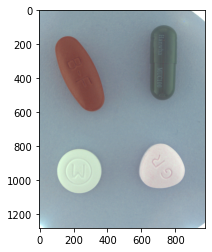

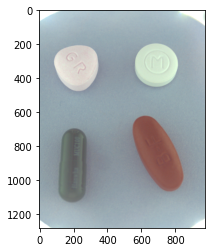

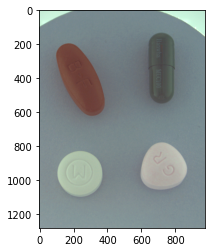

In [100]:
import matplotlib.pyplot as plt
import matplotlib.image as img

for i in range(0, 3):
  plt.imshow(real_image_list_set[0][i])
  plt.show()

In [101]:
len(real_image_list_set[2])

3

In [102]:
real_image_list_set[0]

[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=976x1280 at 0x7F7A7435D2E0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=976x1280 at 0x7F7A7435D460>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=976x1280 at 0x7F7A7435D8B0>]

In [122]:
json_file_list_set = []

# path_jsons = "/content/drive/MyDrive/Project2/DataSet/TL_1/K-000250-000573-002483-006192_json/"+drug_name
# path_root_jsons = "/content/drive/MyDrive/Project2/DataSet/TL_1/"
#for drugs_name_json in json_folder_list_set:
  # for k in range(0, len(drug_list_set)):
  #   for l in range(0, len(drug_list_set[k])):
  #     print("===")
num = 0
num2 = 0
for drugs_name_json in json_folder_list_set:
  for i in range(0, len(json_file_list2_set)):
    json_file_list = [] #json 파일을 담는다.   json_file_list: json 파일 리스트, json_
    
   # print(json_folder_list_set[i])
    #for j in range(0, len(json_file_list2_set[i])):
    for j in range(0, 4):
      
      #final_json_path = path_jsons+drug+"/"+name
      #final_json_path = path_root_jsons+drugs_name_json+"/"+drug_list_set[i][j]+"/"+json_file_list2_set[i][j]
      for k in range(0, 1):
        final_json_path = path_root_jsons+json_folder_list_set[i]+"/"+drug_list_set[i][j]+"/"+json_file_list2_set[num][k] #drug_list_Set: 4, json_file_list2: 3
        print(final_json_path)
        final_json_file = open(final_json_path)
        json_file_list.append(json.load(final_json_file))
        print(len(json_file_list))
      num += 1
      num2 += 1

    
    json_file_list_set.append(json_file_list)

  #print(len(json_file_list_set))

/content/drive/MyDrive/Project2/DataSet/TL_1/K-000250-012778-013395-037777_json/K-000250/K-000250-012778-013395-037777_0_2_0_2_90_000_200.json
1
/content/drive/MyDrive/Project2/DataSet/TL_1/K-000250-012778-013395-037777_json/K-013395/K-000250-012778-013395-037777_0_2_0_2_90_000_200.json
2
/content/drive/MyDrive/Project2/DataSet/TL_1/K-000250-012778-013395-037777_json/K-012778/K-000250-012778-013395-037777_0_2_0_2_90_000_200.json
3
/content/drive/MyDrive/Project2/DataSet/TL_1/K-000250-012778-013395-037777_json/K-037777/K-000250-012778-013395-037777_0_2_0_2_70_000_200.json
4
/content/drive/MyDrive/Project2/DataSet/TL_1/K-000250-013161-022362-022627_json/K-022627/K-000250-013161-022362-022627_0_2_0_2_75_000_200.json
1
/content/drive/MyDrive/Project2/DataSet/TL_1/K-000250-013161-022362-022627_json/K-000250/K-000250-013161-022362-022627_0_2_0_2_75_000_200.json
2
/content/drive/MyDrive/Project2/DataSet/TL_1/K-000250-013161-022362-022627_json/K-022362/K-000250-013161-022362-022627_0_2_0_2_70_

IndexError: ignored

In [120]:
len(json_file_list2_set)

2004

In [107]:
json_file_list2_set

[['K-000250-012778-013395-037777_0_2_0_2_90_000_200.json',
  'K-000250-012778-013395-037777_0_2_0_2_75_000_200.json',
  'K-000250-012778-013395-037777_0_2_0_2_70_000_200.json'],
 ['K-000250-012778-013395-037777_0_2_0_2_90_000_200.json',
  'K-000250-012778-013395-037777_0_2_0_2_75_000_200.json',
  'K-000250-012778-013395-037777_0_2_0_2_70_000_200.json'],
 ['K-000250-012778-013395-037777_0_2_0_2_90_000_200.json',
  'K-000250-012778-013395-037777_0_2_0_2_70_000_200.json',
  'K-000250-012778-013395-037777_0_2_0_2_75_000_200.json'],
 ['K-000250-012778-013395-037777_0_2_0_2_70_000_200.json',
  'K-000250-012778-013395-037777_0_2_0_2_90_000_200.json',
  'K-000250-012778-013395-037777_0_2_0_2_75_000_200.json'],
 ['K-000250-013161-022362-022627_0_2_0_2_75_000_200.json',
  'K-000250-013161-022362-022627_0_2_0_2_90_000_200.json',
  'K-000250-013161-022362-022627_0_2_0_2_70_000_200.json'],
 ['K-000250-013161-022362-022627_0_2_0_2_75_000_200.json',
  'K-000250-013161-022362-022627_0_2_0_2_90_000_200

In [125]:
len(json_file_list_set[0])

4

In [74]:
json_file_list2_set

[['K-000250-012778-013395-037777_0_2_0_2_90_000_200.json',
  'K-000250-012778-013395-037777_0_2_0_2_75_000_200.json',
  'K-000250-012778-013395-037777_0_2_0_2_70_000_200.json'],
 ['K-000250-012778-013395-037777_0_2_0_2_90_000_200.json',
  'K-000250-012778-013395-037777_0_2_0_2_75_000_200.json',
  'K-000250-012778-013395-037777_0_2_0_2_70_000_200.json'],
 ['K-000250-012778-013395-037777_0_2_0_2_90_000_200.json',
  'K-000250-012778-013395-037777_0_2_0_2_70_000_200.json',
  'K-000250-012778-013395-037777_0_2_0_2_75_000_200.json'],
 ['K-000250-012778-013395-037777_0_2_0_2_70_000_200.json',
  'K-000250-012778-013395-037777_0_2_0_2_90_000_200.json',
  'K-000250-012778-013395-037777_0_2_0_2_75_000_200.json'],
 ['K-000250-013161-022362-022627_0_2_0_2_75_000_200.json',
  'K-000250-013161-022362-022627_0_2_0_2_90_000_200.json',
  'K-000250-013161-022362-022627_0_2_0_2_70_000_200.json'],
 ['K-000250-013161-022362-022627_0_2_0_2_75_000_200.json',
  'K-000250-013161-022362-022627_0_2_0_2_90_000_200

In [130]:
print(json_file_list_set[0])

[{'images': [{'file_name': 'K-000250-012778-013395-037777_0_2_0_2_90_000_200.png', 'width': 976, 'height': 1280, 'imgfile': 'K-000250-012778-013395-037777_0_2_0_2_90_000_200.png', 'drug_N': 'K-000250', 'drug_S': '정상알약', 'back_color': '연회색 배경', 'drug_dir': '앞면', 'light_color': '주백색', 'camera_la': 90, 'camera_lo': 0, 'size': 200, 'dl_idx': '249', 'dl_mapping_code': 'K-000250', 'dl_name': '마그밀정(수산화마그네슘)', 'dl_name_en': 'Magmil Tab. 500mg', 'img_key': 'http://connectdi.com/design/img/drug/1NgBQQRiuc_.jpg', 'dl_material': '수산화마그네슘', 'dl_material_en': 'Magnesium Hydroxide', 'dl_custom_shape': '정제, 저작정', 'dl_company': '삼남제약(주)', 'dl_company_en': 'Samnam', 'di_company_mf': '', 'di_company_mf_en': '', 'item_seq': 197400246, 'di_item_permit_date': '19740902', 'di_class_no': '[02340]제산제', 'di_etc_otc_code': '일반의약품', 'di_edi_code': '653700240,A11800371', 'chart': '흰색의 원형정제', 'drug_shape': '원형', 'thick': 4.5, 'leng_long': 11.1, 'leng_short': 11.1, 'print_front': '마크', 'print_back': '마크', 'color_cla

In [131]:
#json_file_list[0].get('annotations')[0]
len(json_file_list_set[0])

4

In [142]:
real_image_list_set[1]

[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=976x1280 at 0x7F7A7435D2E0>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=976x1280 at 0x7F7A7435D460>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGB size=976x1280 at 0x7F7A7435D8B0>]

In [145]:
json_file_list_set[0]

[{'images': [{'file_name': 'K-000250-012778-013395-037777_0_2_0_2_90_000_200.png',
    'width': 976,
    'height': 1280,
    'imgfile': 'K-000250-012778-013395-037777_0_2_0_2_90_000_200.png',
    'drug_N': 'K-000250',
    'drug_S': '정상알약',
    'back_color': '연회색 배경',
    'drug_dir': '앞면',
    'light_color': '주백색',
    'camera_la': 90,
    'camera_lo': 0,
    'size': 200,
    'dl_idx': '249',
    'dl_mapping_code': 'K-000250',
    'dl_name': '마그밀정(수산화마그네슘)',
    'dl_name_en': 'Magmil Tab. 500mg',
    'img_key': 'http://connectdi.com/design/img/drug/1NgBQQRiuc_.jpg',
    'dl_material': '수산화마그네슘',
    'dl_material_en': 'Magnesium Hydroxide',
    'dl_custom_shape': '정제, 저작정',
    'dl_company': '삼남제약(주)',
    'dl_company_en': 'Samnam',
    'di_company_mf': '',
    'di_company_mf_en': '',
    'item_seq': 197400246,
    'di_item_permit_date': '19740902',
    'di_class_no': '[02340]제산제',
    'di_etc_otc_code': '일반의약품',
    'di_edi_code': '653700240,A11800371',
    'chart': '흰색의 원형정제',
    'dru

[514, 150, 270, 275]


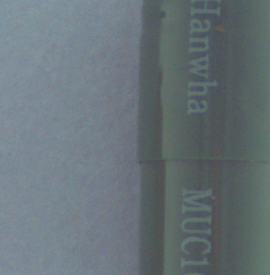

[116, 94, 321, 502]


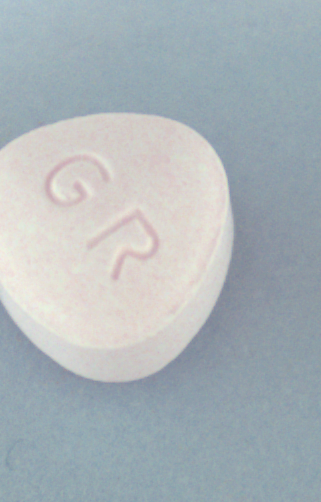

[629, 121, 247, 441]


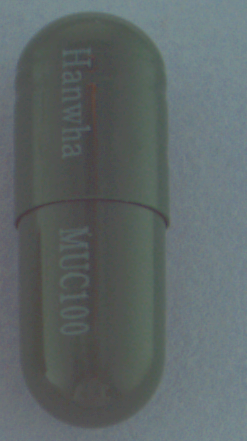

[615, 778, 255, 406]


IndexError: ignored

In [140]:
import json #제이슨 집합: 각 알약 네개 조합, 이미지 집합: 알약
# json_file_list: json 파일의 리스트
# json_list: json의 파일명 리스트 (.json 포함)
# real_image_list: 이미지 파일의 리스트
# image_list: 이미지 파일명의 리스트 (.png 미포함)
for j in range(0, len(real_image_list_set)):
  for i, jsonFile in enumerate(json_file_list_set[i]):
    bBox = jsonFile['annotations'][0]['bbox']
    print(bBox)
    #print(image_list[i])
    croppedImage = real_image_list_set[j][i].crop(((bBox[0], bBox[1], bBox[0]+bBox[2], bBox[1]+bBox[3])))
    display(croppedImage)